In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
print(dataset.shape)

(150, 5)


In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in dataset.columns :
    listItem.append( [col, dataset[col].nunique(), dataset[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,sepal-length,35,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5, 4.5, 5.3, 7.0, 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6.0, 6.1, 5.6, 6.7, 6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9]"
1,sepal-width,23,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4.0, 4.4, 3.8, 3.3, 4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2.0, 2.2, 2.5, 2.6]"
2,petal-length,43,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, 4.7, 4.5, 4.9, 4.0, 4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5.0, 3.8, 3.7, 5.1, 3.0, 6.0, 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9, 5.7, 6.4, 5.4, 5.2]"
3,petal-width,22,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1.0, 1.1, 1.8, 1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2.0, 2.4, 2.3]"
4,class,3,"[Iris-setosa, Iris-versicolor, Iris-virginica]"


In [7]:
le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class']) # 0 iris-sentosa, 1 Iris-versicolor, 2 Iris-virginica

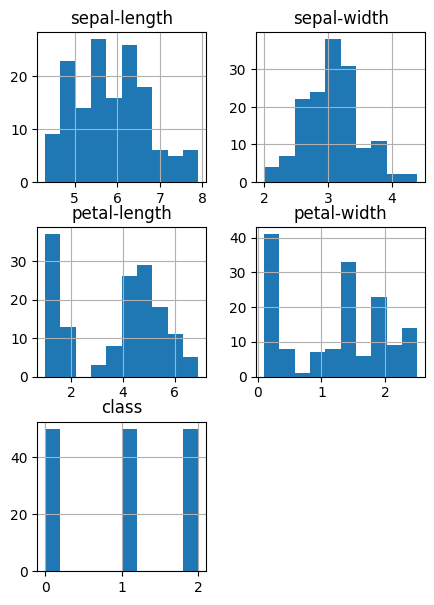

In [8]:
dataset.hist(figsize=(5,7))
plt.show()

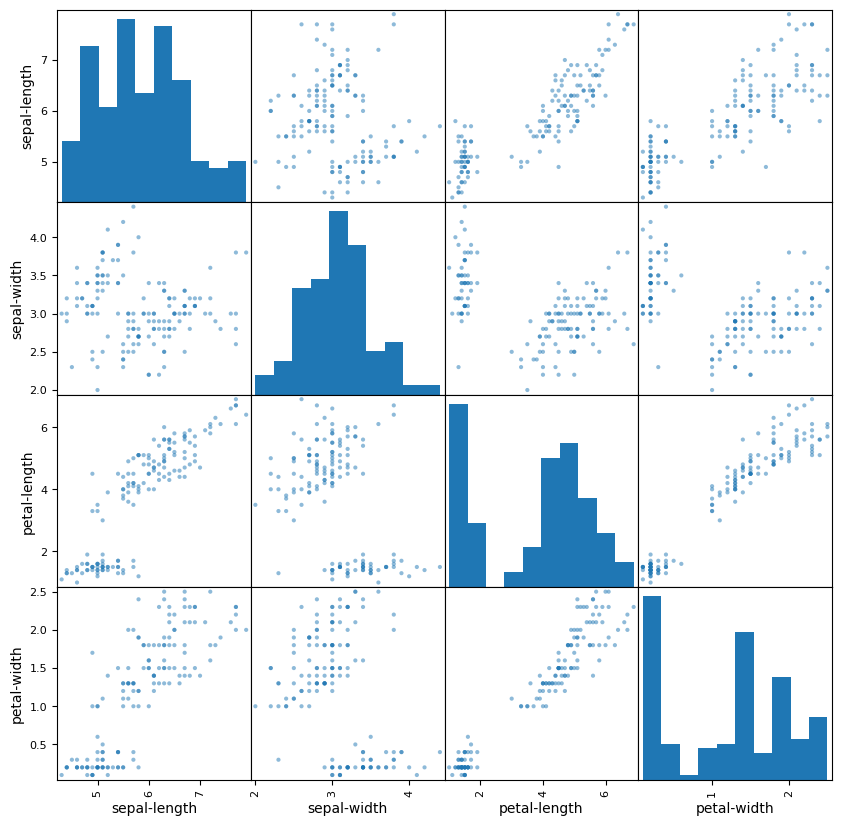

In [9]:
pd.plotting.scatter_matrix(dataset.drop(columns='class'), figsize=(10,10))
plt.show()

In [10]:
array = dataset.values
print(array[:5])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


In [11]:
X = dataset.drop(columns=['class'])
y = dataset['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.30, random_state=42)

In [13]:
models = [('LR',LogisticRegression(solver = 'liblinear', multi_class='ovr')),
          ('CART',DecisionTreeClassifier(random_state=42)),
          ('KNN',KNeighborsClassifier()),
          ('LDA',LinearDiscriminantAnalysis()),
          ('NB', GaussianNB()),
          ('SVM', SVC(gamma='auto'))]

In [14]:
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: mean %f, std: (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: mean 0.960909, std: (0.065562)
CART: mean 0.933636, std: (0.043608)
KNN: mean 0.961818, std: (0.046851)
LDA: mean 0.970909, std: (0.044499)
NB: mean 0.971818, std: (0.043112)
SVM: mean 0.961818, std: (0.046851)


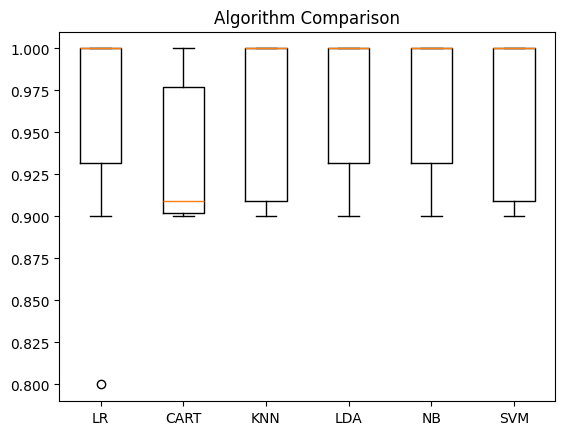

In [15]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [16]:
model_results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    unique_labels = sorted(list(set(y_test)))

    for label in unique_labels:
        label_str = str(label)
        if label_str in report:  
            precision = report[label_str]['precision']
            recall = report[label_str]['recall']
            f1 = report[label_str]['f1-score']
            model_results.append({
                'Model': name,
                'Accuracy': round(accuracy, 3),
                'Class': label,
                'Precision': round(precision, 2),
                'Recall': round(recall, 2),
                'F1-score': round(f1, 2)
            })

database_results = pd.DataFrame(model_results)
print(database_results)

   Model  Accuracy  Class  Precision  Recall  F1-score
0     LR     0.911      0       1.00    1.00      1.00
1     LR     0.911      1       1.00    0.73      0.85
2     LR     0.911      2       0.79    1.00      0.88
3   CART     0.933      0       1.00    1.00      1.00
4   CART     0.933      1       1.00    0.80      0.89
5   CART     0.933      2       0.83    1.00      0.91
6    KNN     0.978      0       1.00    1.00      1.00
7    KNN     0.978      1       0.94    1.00      0.97
8    KNN     0.978      2       1.00    0.93      0.97
9    LDA     0.978      0       1.00    1.00      1.00
10   LDA     0.978      1       0.94    1.00      0.97
11   LDA     0.978      2       1.00    0.93      0.97
12    NB     0.911      0       1.00    1.00      1.00
13    NB     0.911      1       0.82    0.93      0.87
14    NB     0.911      2       0.92    0.80      0.86
15   SVM     0.978      0       1.00    1.00      1.00
16   SVM     0.978      1       0.94    1.00      0.97
17   SVM  

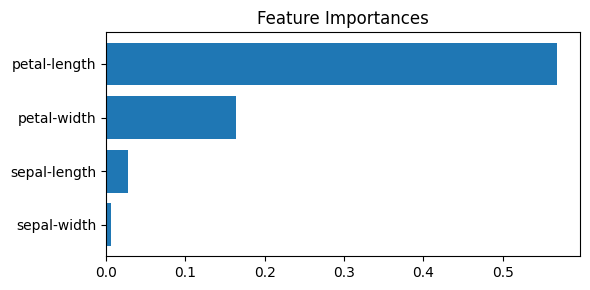

In [17]:
from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42, scoring='accuracy')

# Buat dataframe
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(6, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#1f77b4')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()